In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import pandas as pd
import numpy as np
import os

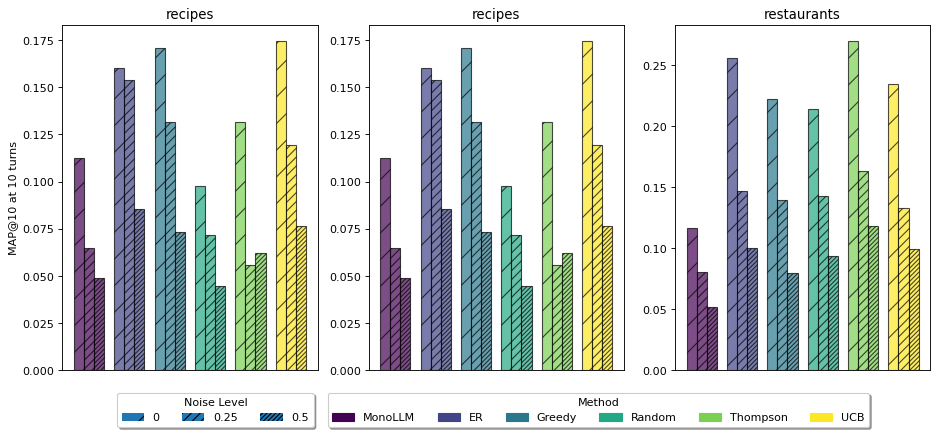

In [146]:
def map_10():
    # MAP@10 big plot
    folder_path = "./"
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    hatches = ['','//','////']
    fig = plt.figure(figsize=(14, 7), dpi=80)  

    # Set up colours
    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))]

    for axis_num in range(len(datasets)):

        ax = fig.add_subplot(1,len(datasets),axis_num+1)

        ax.set_title(datasets[axis_num])

        x = np.arange(len(methods))  # the label locations
        width = 0.25  # the width of the bars

        # Create empty results array - rows are methods, columns are noise levels
        results = np.zeros((len(methods), len(noise_levels)))
        results_error = np.zeros((len(methods), len(noise_levels)))

        for noise_count, noise_level in enumerate(noise_levels): # Fill results array
            exp_results = pd.read_csv(f"organized_results/{datasets[axis_num]}/best/noise{noise_level}/aggregated_results.csv")
            for row_num in range(len(exp_results)):
                results[row_num, noise_count] = exp_results.loc[row_num, "map@9"]
                results_error[row_num, noise_count] = exp_results.loc[row_num, "map@9_ub"] - exp_results.loc[row_num, "map@9_lb"]

        # Plot bars on subplot
        multiplier = 0
        for col_num, noise_level in enumerate(noise_levels):
            offset = width * multiplier
            # rects = ax.bar(x + offset, results[:,col_num], width, alpha=alphas[col_num], color=colors, label=noise_level)
            rects = ax.bar(x + offset, results[:,col_num], width, hatch=hatches[col_num], color=colors, label=noise_level, edgecolor = "black", alpha=0.7)
            # error_bars = ax.errorbar(x + offset, results[:,col_num], yerr=results_error[:,col_num], color="black")
            # ax.bar_label(rects, padding=3)
            multiplier += 1
        
        if axis_num == 0:
            # Add y-axis label if first subplot
            ax.set_ylabel("MAP@10 at 10 turns")

        # Shrink current axis's height by 20% on the bottom for legends
        box = ax.get_position()
        ax.set_position([box.x0, box.y0 + box.height * 0.2,
                        box.width, box.height * 0.8])
        
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off

        if axis_num == 1:
            # Colour legend
            methods_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(methods))]
            methods_legend = plt.legend(methods_handles, [method for method in methods], title='Method', loc='upper center', bbox_to_anchor=(0.9, -0.05),
                    fancybox=True, shadow=True, ncol=len(methods))

            # Opacity legend
            # alpha_patches = [mpatches.Patch(color='navy', alpha=alphas[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            noise_patches = [mpatches.Patch(hatch=hatches[i], label=noise_levels[i]) for i in range(len(noise_levels))]
            # noise_handles = [plt.Rectangle((0,0),1,1, color='black', alpha=alphas) for i in range(len(noise_levels))]
            noise_legend = plt.legend(handles=noise_patches, title='Noise Level', loc='upper center', bbox_to_anchor=(-0.6, -0.05),
                    fancybox=True, shadow=True, ncol=len(noise_levels))

            # Add colour legend back
            plt.gca().add_artist(methods_legend)

    # Save and show 
    file_name = "big_MAPat10_plot.png"
    fig.savefig(file_name)

    plt.show()

map_10()

### Cumulative Regret Plot

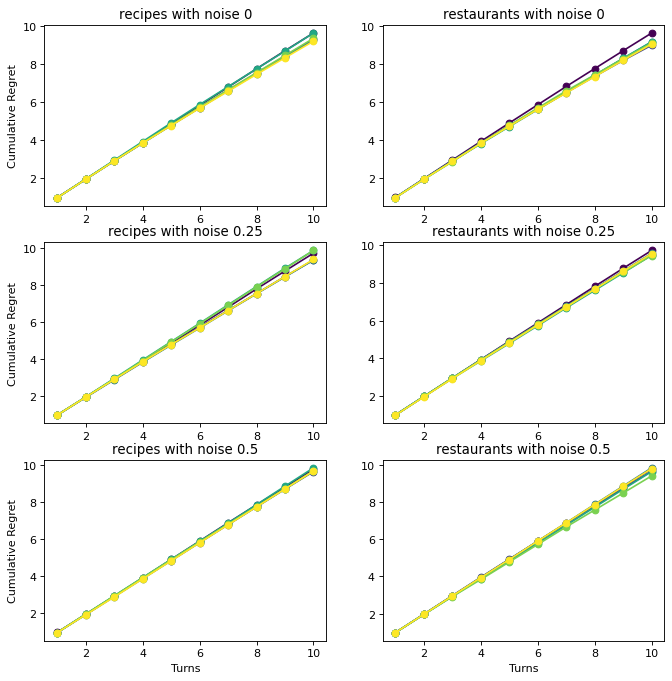

In [28]:
def cum_regret():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(10,10), dpi=80)

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] #TODO: Split on more than just color

    for noise_idx, noise_level in enumerate(noise_levels):

        for dataset_idx, dataset in enumerate(datasets):
            
            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                cum_regret = 0.0
                for turn in range(num_turns):
                    cum_regret += (1 - results_df.loc[row_num, 'P_1@%d' % turn])
                    row_maps.append(cum_regret)

                # TODO: Change this to use different kwargs for each method rather than only colors
                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker="o", linestyle="solid", color=colors[row_num], label=methods)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"Cumulative Regret")

                if noise_idx == (len(noise_levels) - 1):
                    # Add x-axis label if bottom subplot
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")

    # Save and show 
    file_name = "big_cum_regret_plot.png"
    fig.savefig(file_name)

    plt.show()

cum_regret()

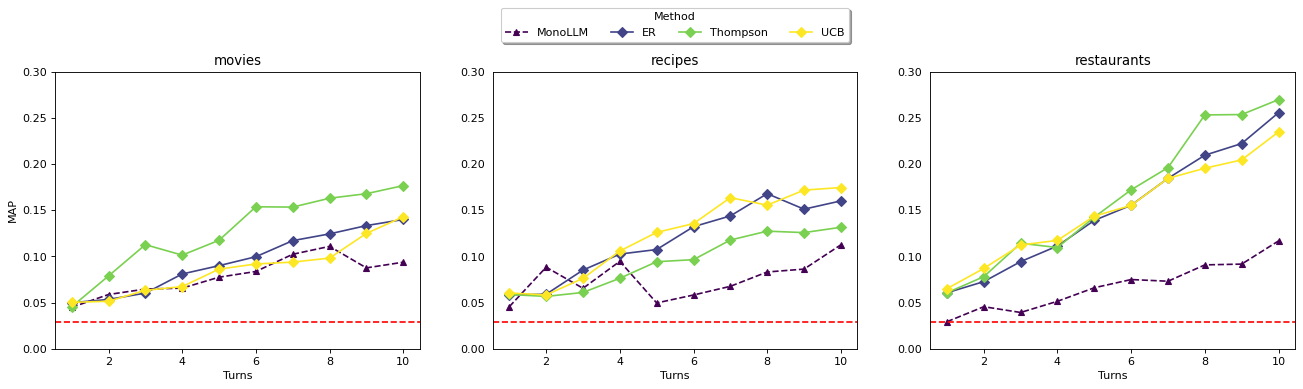

In [114]:
def map_plot_noise0_row():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['movies', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    # omit = [[],[],[]]

    # Keep just Mono, TS, UCB
    # omit = [
    #     ['ER','Greedy','Random'],
    #     ['ER','Greedy','Random'],
    #     ['ER','Greedy','Random']
    # ]

    omit = [
        ['Greedy','Random'],
        ['Greedy','Random'],
        ['Greedy','Random']
    ]

    # omit = [
    #     ['MonoLLM','UCB'],
    #     ['MonoLLM','Thompson'],
    #     ['MonoLLM','UCB']
    # ]

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig = plt.figure(figsize=(20, 4.5), dpi=80) 

    for dataset_idx, dataset in enumerate(datasets): 

        ax = fig.add_subplot(1,len(datasets), dataset_idx+1)

        ax.set_title(f"{dataset}")

        results_df = pd.read_csv(f"organized_results/{dataset}/best/noise0/aggregated_results.csv")

        for row_num in range(len(results_df)):
            if (methods[row_num] in omit[dataset_idx]):
                continue
            row_maps = []
            for turn in range(num_turns):
                row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

            ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

            ax.set_ylim(0,y_max)

            if dataset_idx == 0:
                # Add y-axis label if left-hand subplot
                ax.set_ylabel(f"MAP")
            else:
                ax.tick_params(
                    axis='y',          # changes apply to the y-axis
                    which='both',      # both major and minor ticks are affected
                    right=False,      # ticks along the bottom edge are off
                    left=False,         # ticks along the top edge are off
                    labelbottom=False) # labels along the bottom edge are off
            
            # Add legend above middle plot
            if dataset_idx == 1:
                methods_legend = ax.legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=True, ncol=len(methods))

            ax.set_xlabel(f"Turns")

        p_select_position = 1 / num_items
        total_maps = 0.0
        for i in range(num_recs):
            total_maps += (1 / (i+1))
        total_maps *= p_select_position
        # print(total_maps)
        ax.axhline(y=total_maps, color="r", linestyle="--")

    # Save and show 
    file_name = "big_map_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_noise0_row()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


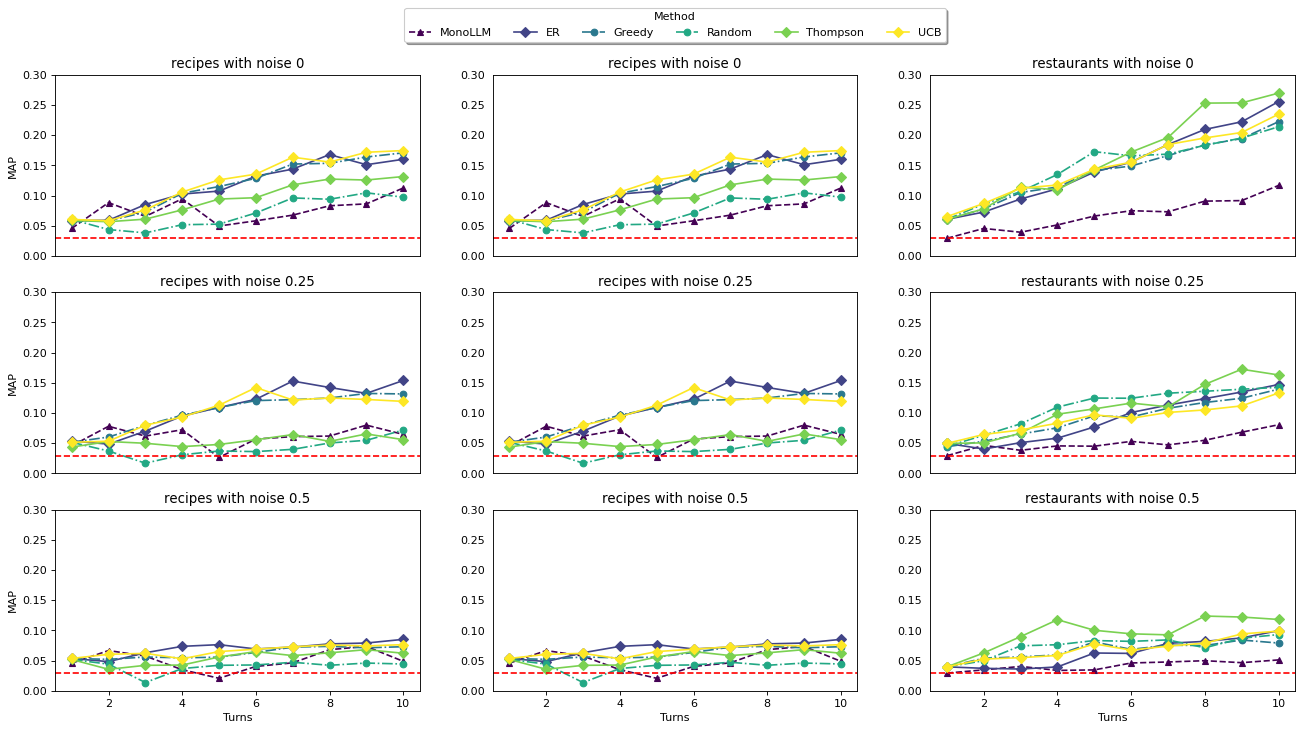

In [86]:
def map_plot_grid():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    fig, axs = plt.subplots(len(noise_levels), len(datasets), figsize=(20, 10), dpi=80)  

    for dataset_idx, dataset in enumerate(datasets):

        for noise_idx, noise_level in enumerate(noise_levels):

            axs[noise_idx, dataset_idx].set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                axs[noise_idx, dataset_idx].plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods[row_num])

                axs[noise_idx, dataset_idx].set_ylim(0,y_max)

                if dataset_idx == 0:
                    # Add y-axis label if left-hand subplot
                    axs[noise_idx, dataset_idx].set_ylabel(f"MAP")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                if noise_idx+1 == len(noise_levels):
                    axs[noise_idx, dataset_idx].set_xlabel(f"Turns")
                else:
                    axs[noise_idx, dataset_idx].tick_params(
                        axis='x',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            axs[noise_idx, dataset_idx].axhline(y=total_maps, color="r", linestyle="--")

            # # Shrink current axis's height by 10% on the bottom for legends
            # box = axs[noise_idx, dataset_idx].get_position()
            # axs[noise_idx, dataset_idx].set_position([box.x0, box.y0 + box.height * 0.1,
            #                 box.width, box.height * 0.9])
            
        methods_legend = axs[0, 1].legend(title='Method', loc='upper center', bbox_to_anchor=(0.5, 1.4),
            fancybox=True, shadow=True, ncol=len(methods))

    # Save and show 
    file_name = "big_map_grid_plot.png"
    fig.savefig(file_name)

    plt.show()

map_plot_grid()

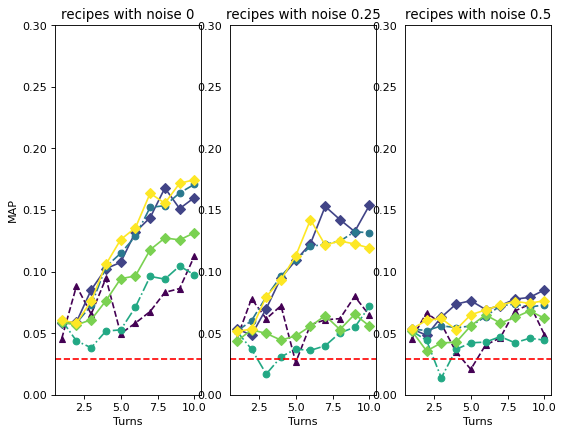

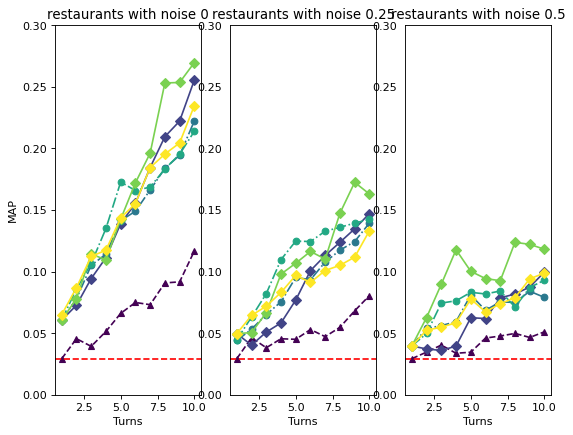

In [60]:
def map_binary_vs_prob():
    # datasets = ['movies', 'recipes', 'restaurants']
    datasets = ['recipes', 'restaurants']
    methods = ['MonoLLM', 'ER', 'Greedy', 'Random', 'Thompson', 'UCB']
    noise_levels = ['0', '0.25', '0.5']
    alphas = [0.33, 0.66, 1]
    num_turns = 10
    num_items = 100
    num_recs = 10
    y_max = 0.3

    colors = mpl.colormaps['viridis']
    colors = [colors(i) for i in np.linspace(0, 1, len(methods))] 

    linetypes = [
        {'color': colors[0], 'marker': '^', 'line': 'dashed'},
        {'color': colors[1], 'marker': 'D', 'line': 'solid'}, 
        {'color': colors[2], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[3], 'marker': 'o', 'line': 'dashdot'},
        {'color': colors[4], 'marker': 'D', 'line': 'solid'},
        {'color': colors[5], 'marker': 'D', 'line': 'solid'},
    ]

    

    for dataset_idx, dataset in enumerate(datasets):

        fig = plt.figure(figsize=(8, 6), dpi=80)  

        for noise_idx, noise_level in enumerate(noise_levels):

            ax = fig.add_subplot(1,len(noise_levels), noise_idx+1)

            ax.set_title(f"{dataset} with noise {noise_level}")

            results_df = pd.read_csv(f"organized_results/{dataset}/best/noise{noise_level}/aggregated_results.csv")

            for row_num in range(len(results_df)):
                row_maps = []
                for turn in range(num_turns):
                    row_maps.append(results_df.loc[row_num, 'map@%d' % turn])

                ax.plot(np.linspace(1,num_turns,num_turns), row_maps, marker=linetypes[row_num]['marker'], linestyle=linetypes[row_num]['line'], color=linetypes[row_num]['color'], label=methods)

                ax.set_ylim(0,y_max)

                if noise_idx == 0:
                    # Add y-axis label if left-hand subplot
                    ax.set_ylabel(f"MAP")
                else:
                    ax.tick_params(
                        axis='y',          # changes apply to the y-axis
                        which='both',      # both major and minor ticks are affected
                        right=False,      # ticks along the bottom edge are off
                        left=False,         # ticks along the top edge are off
                        labelbottom=False) # labels along the bottom edge are off

                ax.set_xlabel(f"Turns")

            p_select_position = 1 / num_items
            total_maps = 0.0
            for i in range(num_recs):
                total_maps += (1 / (i+1))
            total_maps *= p_select_position
            # print(total_maps)
            ax.axhline(y=total_maps, color="r", linestyle="--")

        # Save and show 
        file_name = "big_map_plot.png"
        fig.savefig(file_name)

        plt.show()

map_binary_vs_prob()